In [90]:
import numpy as np
import pandas as pd

import warnings                   # as the name suggests this will ignore all the warnings in this notebook
warnings.filterwarnings("ignore")
import cufflinks as cf    # cufflinks binds pandas with plotly

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go



In [88]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

###### loading the hr data

In [2]:
#loading the hr data
hr_df = pd.read_csv('hr_data.csv')   #reading the data stored in csv file

In [3]:
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [4]:
hr_df.shape     #gives the shape of the data frame

(14999, 9)

In [5]:
hr_df.size   #14999*9 = 134991      gives the total size

134991

In [6]:
hr_df.info()     #checking for the null values. fortunately there's no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [7]:
hr_df['department'].unique()   #lists out the various departmenst in the company

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr_df['salary'].unique()     # lists out the salary. here its categorized as low ,medium and high

array(['low', 'medium', 'high'], dtype=object)

###### Loading the employee satisfaction data

In [9]:
s_df=pd.read_excel('employee_satisfaction_evaluation.xlsx')

In [10]:
s_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [11]:
#hr_df.set_index('employee_id')

In [12]:
#s_df.set_index('EMPLOYEE #')

In [13]:
main_df= hr_df.set_index('employee_id').join(s_df.set_index('EMPLOYEE #')) 
#joining both data frames with employee id number(employee_id in hr_df and EMPLOYEE # in s_df)

In [14]:
main_df  #note the employee_id is the index here

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,1,0,support,low,0.40,0.57
87673,2,160,3,0,1,0,support,low,0.37,0.48
87679,2,143,3,0,1,0,support,low,0.37,0.53


In [15]:
main_df=main_df.reset_index() # resetting the index from employee_id to normal

In [16]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [17]:
main_df.info()               
# null values found as we can see the total values are 14999 but in our satisfaction_level column and the 
# last_evaluation column the values are less than 14999 which reflects that there are few null values.
# we will have to fill those values explicitly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [18]:
main_df[main_df.isnull().any(axis=1)]   #listing those data where there is NaN(not a number)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [19]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
main_df.fillna(main_df.mean(),inplace=True)   #filling those NaN with mean values, we can use median also

In [21]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [22]:
main_df[main_df.isnull().any(axis=1)]  #we can see there's no data with NaN now

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [23]:
main_df.loc[main_df['employee_id']==1340]   #list the data by employee_id ,eg here is by 1340

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
53,1340,2,132,3,0,1,0,support,low,0.61283,0.716125


In [24]:
main_df.drop(columns='employee_id',inplace=True)  #dropping the column employee_id as we won't need this for our prediction

In [25]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [26]:
main_df.groupby('department').sum()    # grouping by department sum values

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [27]:
main_df.groupby('department').mean()   #grouping by department mean values

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [28]:
main_df['left'].value_counts()  #listing the  left counts.  0 indictes the employee stayed and 1 indicates h/she left

0    11428
1     3571
Name: left, dtype: int64

# Data Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

No handles with labels found to put in legend.


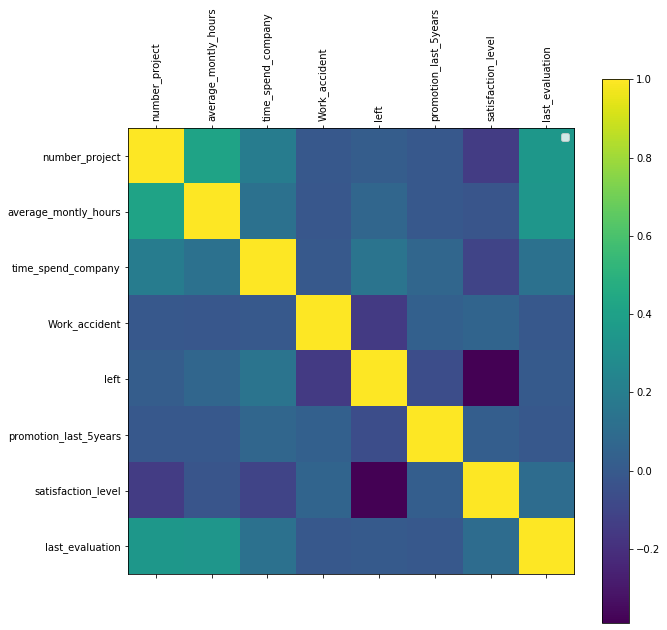

In [30]:
#to show the correlation between the various data columns
def plot_corr(df,size=10):
    
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    

plot_corr(main_df)

<BarContainer object of 14999 artists>

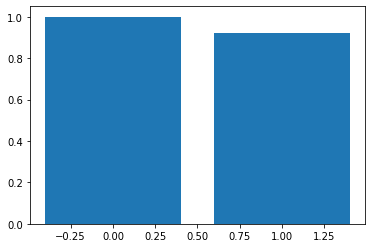

In [31]:
plt.bar(x=main_df['left'],height=main_df['satisfaction_level'])
# those who left i.e >0.5  -- which is close to 1 -- in the figure have less satisfaction level 
# and those who didn't leave i.e <0.5 ---which is close to 0 -- in the figure have more satisfaction level

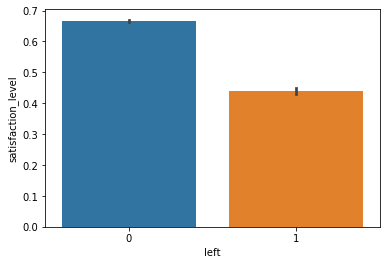

In [32]:
sns.barplot(x='left',y='satisfaction_level',data=main_df)

# those who left which is  1 in the figure have less satisfaction level 
# and those who didn't leave which is  0 in the figure have more satisfaction level

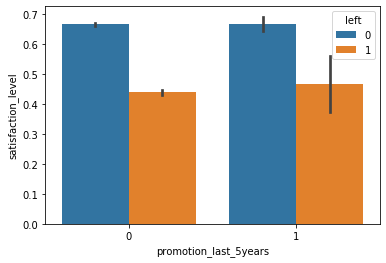

In [33]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=main_df,hue='left')
# in the figure, those who got promotion in last 5 years i.e 1 , the one who had good 
# satisfaction level ,didn't leave as shown by blue. and those less satisfied left despite the promotion. 
# the same holds good for those who didn't get the promotion in last 5 years i.e 0

In [34]:
#sns.pairplot(main_df,hue='left')

# Data Preprocessing

In [35]:
y=main_df[['department','salary']]  #dataframe containing department and salary

In [36]:
y

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [37]:
# salary is categorical data so we have to encode it using label encoder 
#0 represents high, 1 represents low and 2 represents medium in this case
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

k=le.fit_transform(main_df['salary'])   #labelencoding for salary

In [38]:
k

array([1, 2, 2, ..., 1, 1, 1])

In [39]:
main_df  #old main_df with salary as categorical data

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [40]:
main_df['salary_num']=k  # adding new column where salary is encoded

In [41]:
main_df   #new main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2
3,5,223,5,0,1,0,sales,low,0.72,0.87,1
4,2,159,3,0,1,0,sales,low,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57,1
14995,2,160,3,0,1,0,support,low,0.37,0.48,1
14996,2,143,3,0,1,0,support,low,0.37,0.53,1
14997,6,280,4,0,1,0,support,low,0.11,0.96,1


In [42]:
main_df.loc[main_df['salary']=='high']    #checking for salary is high

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [43]:
main_df.drop(['salary'],axis=1,inplace=True) 
#dropping salary as we have already added  salary_num to the dataframe which is encoded

In [44]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,0.38,0.53,1
1,5,262,6,0,1,0,sales,0.80,0.86,2
2,7,272,4,0,1,0,sales,0.11,0.88,2
3,5,223,5,0,1,0,sales,0.72,0.87,1
4,2,159,3,0,1,0,sales,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,0.40,0.57,1
14995,2,160,3,0,1,0,support,0.37,0.48,1
14996,2,143,3,0,1,0,support,0.37,0.53,1
14997,6,280,4,0,1,0,support,0.11,0.96,1


In [45]:
z=le.fit_transform(main_df['department'])    #labelencoding for department
# 0 for IT
#1 for RandD
#2 for accounting
#3 for hr
#4 for management
#5 for marketing
#6 for product_mng
#7 for sales
#8 for support
#9 for technical

In [46]:
z

array([7, 7, 7, ..., 8, 8, 8])

In [47]:
main_df['department_num']=z   
#adding new column department_num which has the encoded data for the department column

In [48]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,sales,0.38,0.53,1,7
1,5,262,6,0,1,0,sales,0.80,0.86,2,7
2,7,272,4,0,1,0,sales,0.11,0.88,2,7
3,5,223,5,0,1,0,sales,0.72,0.87,1,7
4,2,159,3,0,1,0,sales,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,0.40,0.57,1,8
14995,2,160,3,0,1,0,support,0.37,0.48,1,8
14996,2,143,3,0,1,0,support,0.37,0.53,1,8
14997,6,280,4,0,1,0,support,0.11,0.96,1,8


In [49]:
main_df.loc[main_df['department']=='hr']

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num,department_num
31,2,134,3,0,1,0,hr,0.45000,0.570000,1,3
32,2,145,3,0,1,0,hr,0.40000,0.510000,1,3
33,2,140,3,0,1,0,hr,0.61283,0.716125,1,3
34,4,246,6,0,1,0,hr,0.84000,0.870000,1,3
108,3,177,4,0,1,0,hr,0.71000,0.870000,2,3
...,...,...,...,...,...,...,...,...,...,...,...
14902,2,159,3,0,1,0,hr,0.45000,0.460000,0,3
14975,7,310,4,0,1,0,hr,0.10000,0.790000,2,3
14976,2,136,3,0,1,0,hr,0.40000,0.470000,2,3
14977,4,251,6,0,1,0,hr,0.81000,0.850000,2,3


In [50]:
main_df.drop(['department'],axis=1,inplace=True)
#removing or dropping department column as we have already added department_num which has encoded data of department

In [51]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


In [52]:
X=main_df.drop(['left'],axis=1)
#dropping left as we want it to be the dependent varaiable. everything except that is independent variable.

In [53]:
X    #independent variable

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,0.40,0.57,1,8
14995,2,160,3,0,0,0.37,0.48,1,8
14996,2,143,3,0,0,0.37,0.53,1,8
14997,6,280,4,0,0,0.11,0.96,1,8


In [54]:
y=main_df['left']   #dependent variable

In [55]:
y.size

14999

# Classifiers


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,)


In [57]:
X_test

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
11766,3,192,3,0,0,0.76,0.85,1,5
5174,5,258,3,0,0,0.80,0.97,2,0
5611,3,138,4,1,0,0.95,0.64,1,9
14625,5,233,5,0,0,0.91,0.97,2,3
7610,2,185,6,0,0,0.49,0.83,2,8
...,...,...,...,...,...,...,...,...,...
7698,4,170,2,1,0,0.96,0.60,1,6
8994,4,130,3,0,0,0.58,0.79,2,0
105,7,224,5,0,0,0.24,0.46,2,2
5914,3,168,3,0,0,0.97,0.92,1,9


In [58]:
y_test

11766    0
5174     0
5611     0
14625    1
7610     0
        ..
7698     0
8994     0
105      1
5914     0
9748     0
Name: left, Length: 4500, dtype: int64

In [59]:
Catagory=['Employee will stay','Employee will Leave']

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

## 1) Decision tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
prediction_dt=dt.predict(X_test)

In [63]:
prediction_dt

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
accuracy_dt=accuracy_score(y_test,prediction_dt)*100

In [65]:
accuracy_dt

97.4888888888889

In [66]:
cm = confusion_matrix(y_test, prediction_dt)
cm

array([[3360,   76],
       [  37, 1027]])

In [67]:
custom_dt=[[1,500,3,6,0,0.90,0.89,1,8]]

In [68]:
print(int(dt.predict(custom_dt)))

1


In [69]:
Catagory[int(dt.predict(custom_dt))]

'Employee will Leave'

In [70]:
dt.feature_importances_

array([1.01400908e-01, 8.60682019e-02, 1.39183347e-01, 2.30461881e-03,
       1.88632422e-05, 5.07731780e-01, 1.50384551e-01, 3.95391436e-03,
       8.95381571e-03])

In [71]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X_train.columns,columns=[
'Importance']).sort_values('Importance',ascending=False)


In [72]:
feature_importance

,Importance
satisfaction_level,0.507732
last_evaluation,0.150385
time_spend_company,0.139183
number_project,0.101401
average_montly_hours,0.086068
department_num,0.008954
salary_num,0.003954
Work_accident,0.002305
promotion_last_5years,0.000019


## 2) K Nearest Neighbour(KNN)

#### Feature scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [75]:
X_train_std

array([[ 0.15641109, -0.23604933, -1.02159106, ..., -0.73821414,
        -0.54908191, -2.04632974],
       [ 0.9661547 ,  1.30469787,  0.34648095, ..., -0.21291509,
         1.04121077,  0.40203675],
       [ 0.15641109, -1.09646659,  4.45069699, ...,  1.53808175,
        -0.54908191,  1.10157003],
       ...,
       [ 0.9661547 , -1.41662185,  0.34648095, ...,  1.47971519,
        -2.13937458, -0.64726317],
       [-0.65333252,  0.12412534, -0.33755506, ..., -0.85494726,
         1.04121077, -0.29749653],
       [ 1.77589831,  1.36472699,  0.34648095, ...,  0.72094989,
        -0.54908191,  0.40203675]])

In [76]:
X_test_std

array([[-0.65333252, -0.17602021, -0.33755506, ...,  0.77931646,
        -0.54908191, -0.29749653],
       [ 0.9661547 ,  1.14462024, -0.33755506, ...,  1.47971519,
         1.04121077, -2.04632974],
       [-0.65333252, -1.25654422,  0.34648095, ..., -0.44638133,
        -0.54908191,  1.10157003],
       ...,
       [ 2.58564192,  0.46429031,  1.03051696, ..., -1.49697944,
         1.04121077, -1.34679646],
       [-0.65333252, -0.65625311, -0.33755506, ...,  1.18788238,
        -0.54908191,  1.10157003],
       [ 0.15641109,  0.56433883,  1.71455296, ..., -1.20514663,
        -2.13937458,  0.75180339]])

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [78]:
prediction_knn=knn.predict(X_test_std)

In [79]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [80]:
accuracy_knn

95.6

In [81]:
prediction_knn

array([0, 0, 0, ..., 1, 0, 0])

In [82]:
cm = confusion_matrix(y_test, prediction_knn)
cm

array([[3311,  125],
       [  73,  991]])

In [83]:
k_range=range(1,26)
scores={}
scores_list=[]


for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)*100
    scores_list.append(accuracy_score(y_test,prediction_knn))


In [84]:
scores

{1: 96.28888888888889,
 2: 96.06666666666666,
 3: 95.6,
 4: 95.6888888888889,
 5: 95.39999999999999,
 6: 95.64444444444445,
 7: 95.28888888888889,
 8: 95.44444444444444,
 9: 95.15555555555557,
 10: 95.22222222222221,
 11: 94.95555555555556,
 12: 94.88888888888889,
 13: 94.62222222222222,
 14: 94.71111111111111,
 15: 94.44444444444444,
 16: 94.4888888888889,
 17: 94.28888888888889,
 18: 94.37777777777778,
 19: 94.15555555555557,
 20: 94.19999999999999,
 21: 94.13333333333334,
 22: 94.13333333333334,
 23: 94.02222222222221,
 24: 94.08888888888889,
 25: 93.97777777777779}

In [85]:
scores_list

[0.9628888888888889,
 0.9606666666666667,
 0.956,
 0.9568888888888889,
 0.954,
 0.9564444444444444,
 0.9528888888888889,
 0.9544444444444444,
 0.9515555555555556,
 0.9522222222222222,
 0.9495555555555556,
 0.9488888888888889,
 0.9462222222222222,
 0.9471111111111111,
 0.9444444444444444,
 0.9448888888888889,
 0.9428888888888889,
 0.9437777777777778,
 0.9415555555555556,
 0.942,
 0.9413333333333334,
 0.9413333333333334,
 0.9402222222222222,
 0.9408888888888889,
 0.9397777777777778]

In [91]:
px.line(x=k_range,y=scores_list)

In [92]:
X_knn=np.array([[20,500,10,6,0,0.10,0.30,1,8]])
X_knn_std=sc.transform(X_knn)


In [93]:
X_knn_std

array([[13.11230885,  5.98696858,  4.45069699, 16.7869553 , -0.14965797,
        -2.04763291, -2.43084442, -0.54908191,  0.75180339]])

In [94]:
X_knn_prediction=knn.predict(X_knn_std)

In [95]:
X_knn_prediction

array([1])

In [96]:
Catagory[int(dt.predict(custom_dt))]

'Employee will Leave'

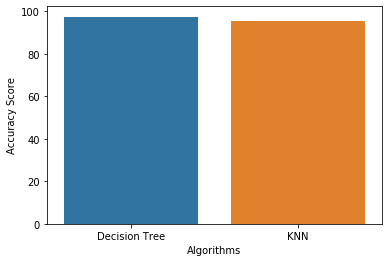

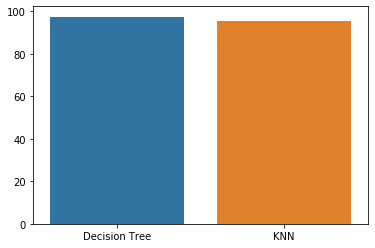

In [98]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms,scores)
plt.show()
ax = sns.barplot(algorithms,scores)
ax.figure.savefig('Different classifier results')